In [11]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
file_path = r"C:\Users\Satya\Downloads\EDA2\adult_with_headers.xlsx"

# Load Excel file
df = pd.read_excel(file_path)
print("First 5 rows of the dataset:")
print(df.head())

# Step 3: Basic Data Exploration
print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics for Numerical Columns:")
print(df.describe())

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


First 5 rows of the dataset:
   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0          

In [12]:
# Step 4: Handle Missing Values
# Impute numerical columns with the median
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical columns with the most frequent value (mode)
cat_cols = df.select_dtypes(include=['object']).columns
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

print("\nMissing Values After Imputation:")
print(df.isnull().sum())



Missing Values After Imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


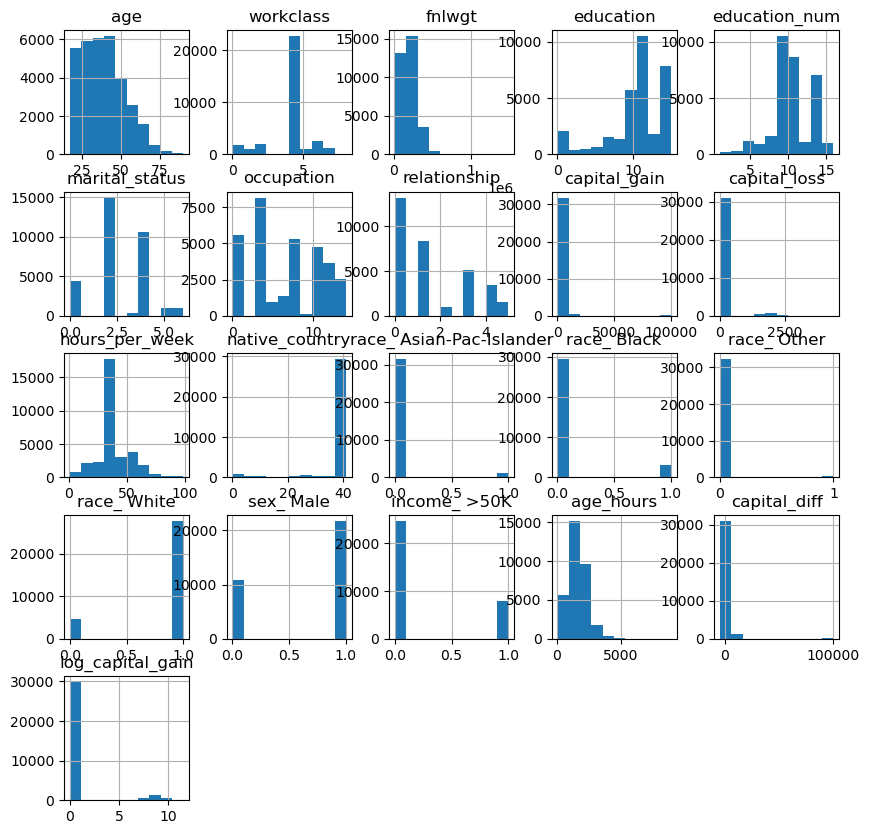

In [9]:
import matplotlib.pyplot as plt #here

df.hist(figsize=(10, 10), bins=10)
plt.show()

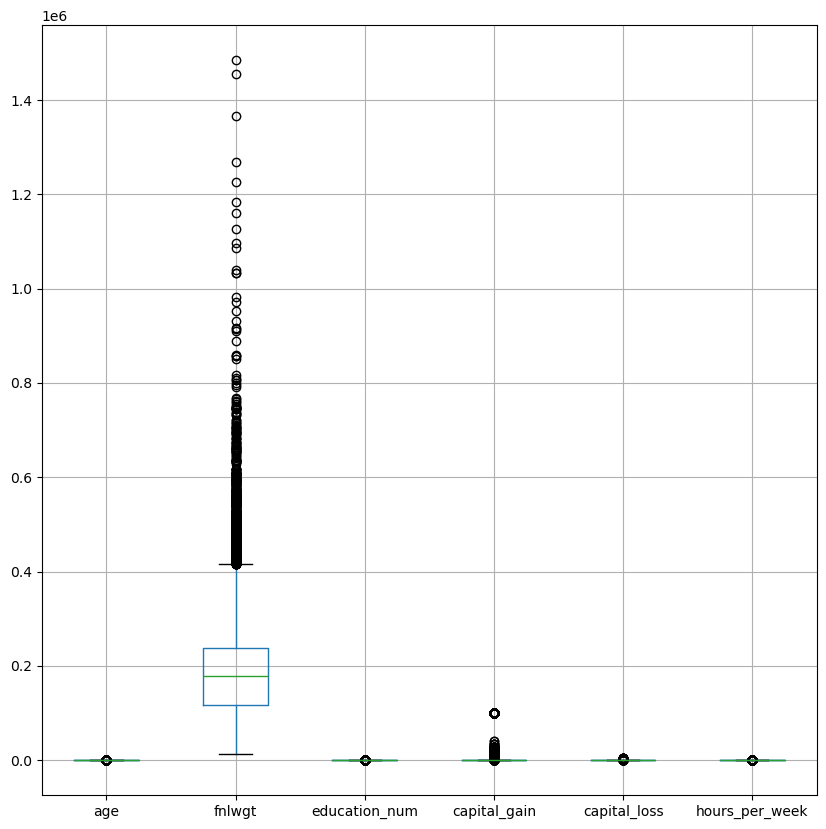

In [13]:
'''box plot''' #here2
df.boxplot(figsize=(10, 10))
plt.show()

In [3]:
# Step 5: Apply Scaling Techniques
scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()

# Scale numerical features
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df[num_cols]), columns=num_cols)
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[num_cols]), columns=num_cols)

print("\nStandard Scaled Data (First 5 rows):")
print(df_standard_scaled.head())

print("\nMin-Max Scaled Data (First 5 rows):")
print(df_minmax_scaled.head())

# Scaling Explanation:
# - Standard Scaling is preferred for normally distributed data or when using algorithms sensitive to the mean and variance.
# - Min-Max Scaling is preferred for algorithms that rely on distances (e.g., KNN, Neural Networks).



Standard Scaled Data (First 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.030671 -1.063611       1.134739      0.148453      -0.21666   
1  0.837109 -1.008707       1.134739     -0.145920      -0.21666   
2 -0.042642  0.245079      -0.420060     -0.145920      -0.21666   
3  1.057047  0.425801      -1.197459     -0.145920      -0.21666   
4 -0.775768  1.408176       1.134739     -0.145920      -0.21666   

   hours_per_week  
0       -0.035429  
1       -2.222153  
2       -0.035429  
3       -0.035429  
4       -0.035429  

Min-Max Scaled Data (First 5 rows):
        age    fnlwgt  education_num  capital_gain  capital_loss  \
0  0.301370  0.044302       0.800000       0.02174           0.0   
1  0.452055  0.048238       0.800000       0.00000           0.0   
2  0.287671  0.138113       0.533333       0.00000           0.0   
3  0.493151  0.151068       0.400000       0.00000           0.0   
4  0.150685  0.221488       0.800000       0.00000      

In [14]:
# Step 6: Encoding Categorical Variables

# One-Hot Encoding for categorical columns with <= 5 categories
low_cardinality_cols = [col for col in cat_cols if df[col].nunique() <= 5]
ohe = OneHotEncoder(sparse=False, drop='first')
encoded_ohe = pd.DataFrame(ohe.fit_transform(df[low_cardinality_cols]), 
                           columns=ohe.get_feature_names_out(low_cardinality_cols))

# Label Encoding for categorical columns with > 5 categories
high_cardinality_cols = [col for col in cat_cols if df[col].nunique() > 5]
le = LabelEncoder()
for col in high_cardinality_cols:
    df[col] = le.fit_transform(df[col])

# Combine Encoded Data
df = pd.concat([df.drop(columns=low_cardinality_cols), encoded_ohe], axis=1)
print("\nDataset After Encoding:")
print(df.head())

# Encoding Discussion:
# - One-Hot Encoding is ideal for low-cardinality features but increases dimensionality.
# - Label Encoding is useful for high-cardinality features but assumes an ordinal relationship.



Dataset After Encoding:
    age  workclass    fnlwgt  education  education_num  marital_status  \
0  39.0          7   77516.0          9           13.0               4   
1  50.0          6   83311.0          9           13.0               2   
2  38.0          4  215646.0         11            9.0               0   
3  53.0          4  234721.0          1            7.0               2   
4  28.0          4  338409.0          9           13.0               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1        2174.0           0.0            40.0   
1           4             0           0.0           0.0            13.0   
2           6             1           0.0           0.0            40.0   
3           6             0           0.0           0.0            40.0   
4          10             5           0.0           0.0            40.0   

   native_country  race_ Asian-Pac-Islander  race_ Black  race_ Other  \
0     

C:\Users\Satya\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(



New Features Created: 'age_hours' and 'capital_diff'.


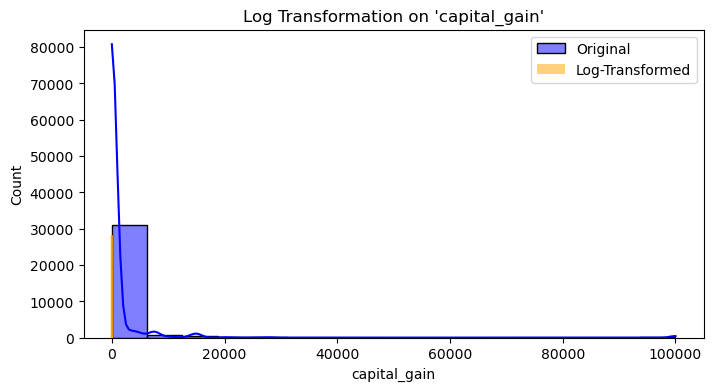

In [6]:
# Step 7: Feature Engineering
# Create interaction features or derived features
df['age_hours'] = df['age'] * df['hours_per_week']  # Interaction between age and work hours
df['capital_diff'] = df['capital_gain'] - df['capital_loss']  # Net capital gain

print("\nNew Features Created: 'age_hours' and 'capital_diff'.")

# Apply Log Transformation to a Skewed Feature
df['log_capital_gain'] = np.log1p(df['capital_gain'])  # Log(1 + x) to avoid log(0)

# Check the distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['capital_gain'], kde=True, color="blue", label="Original")
sns.histplot(df['log_capital_gain'], kde=True, color="orange", label="Log-Transformed")
plt.title("Log Transformation on 'capital_gain'")
plt.legend()
plt.show()


In [15]:
# Step 8: Outlier Detection with Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(df[num_cols])

# Filter outliers
df_outliers_removed = df[outliers == 1]
print("\nShape After Removing Outliers:", df_outliers_removed.shape)



Shape After Removing Outliers: (30933, 18)



PPS Matrix:
                    x                 y   ppscore            case  \
0                 age               age  1.000000  predict_itself   
1                 age         workclass  0.000000      regression   
2                 age            fnlwgt  0.000000      regression   
3                 age         education  0.000000      regression   
4                 age     education_num  0.000000      regression   
..                ...               ...       ...             ...   
436  log_capital_gain         sex_ Male  0.000000      regression   
437  log_capital_gain      income_ >50K  0.000000      regression   
438  log_capital_gain         age_hours  0.005079      regression   
439  log_capital_gain      capital_diff  0.873818      regression   
440  log_capital_gain  log_capital_gain  1.000000  predict_itself   

     is_valid_score               metric  baseline_score   model_score  \
0              True                 None          0.0000      1.000000   
1         

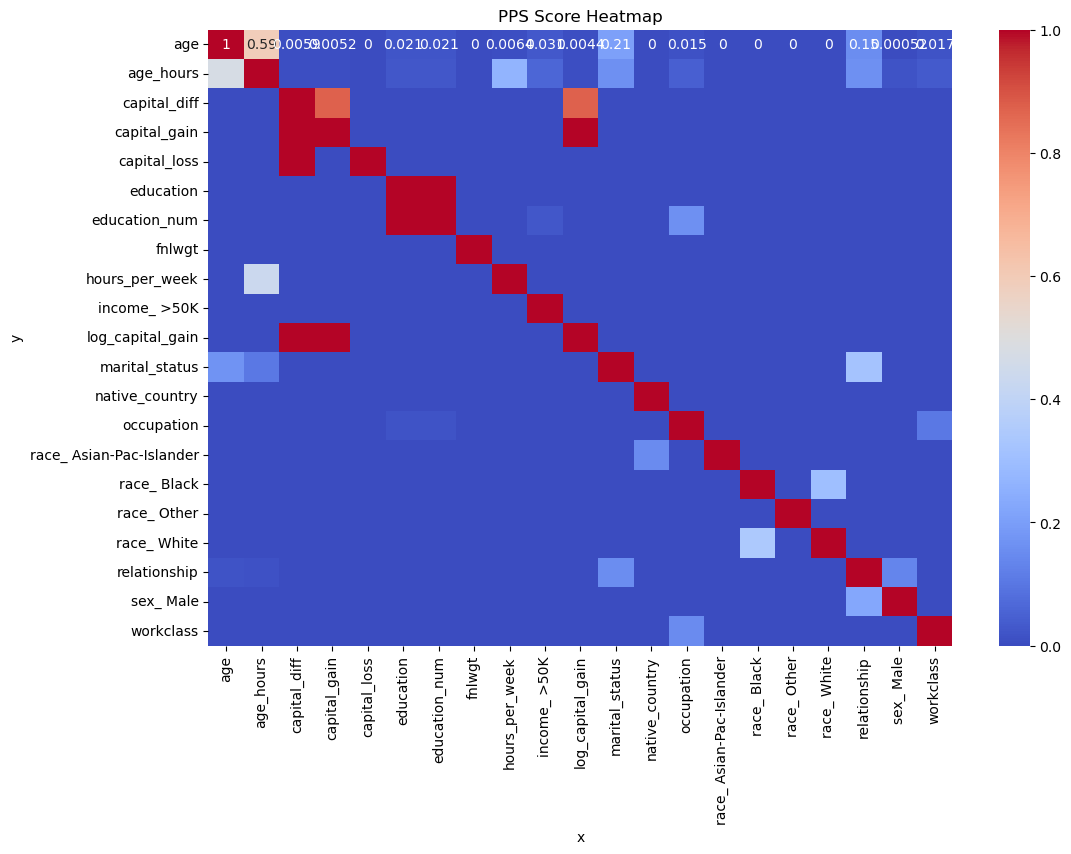

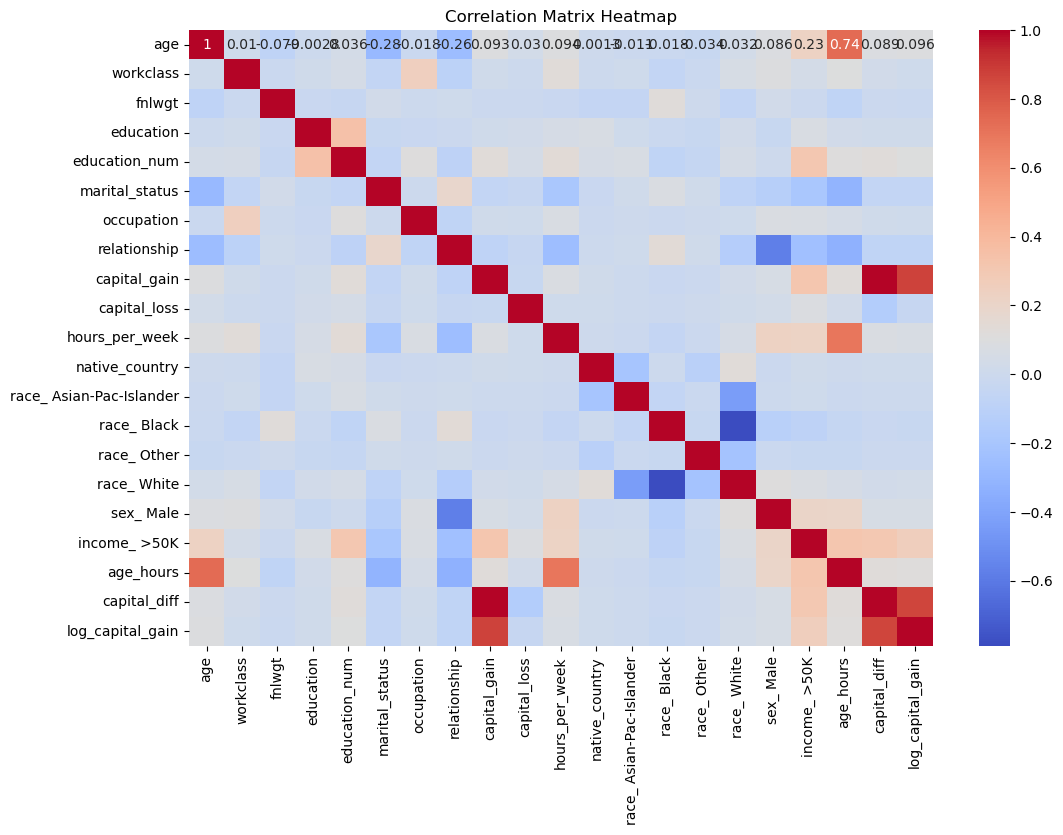


Comparison:
PPS measures predictive power between features, while correlation measures linear relationships.


In [8]:
# Step 9: Feature Selection Using PPS and Correlation Matrix

# PPS Score Matrix
pps_matrix = pps.matrix(df_outliers_removed)
print("\nPPS Matrix:")
print(pps_matrix)

# Heatmap of PPS Scores
plt.figure(figsize=(12, 8))
sns.heatmap(pps_matrix[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore'), 
            cmap="coolwarm", annot=True)
plt.title("PPS Score Heatmap")
plt.show()

# Correlation Matrix
correlation_matrix = df_outliers_removed.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Comparison
print("\nComparison:")
print("PPS measures predictive power between features, while correlation measures linear relationships.")
